## opencvの使い方
OpenCVは画像解析や機械学習によく利用される、コンピュータービジョンライブラリの一つです。基本的な画像変換だけでなく、画像のフィルター処理、顔認識、物体認識、オブジェクトトラッキングなど、実務でよく利用される機能が一通りそろっている非常に使いやすいライブラリになっています。実務で画像認識系の仕事をする際は必ず利用するライブラリになっています。

まずは基本的な使い方からです。

### github
- jupyter notebook形式のファイルは[こちら](https://github.com/hiroshi0530/wa-src/blob/master/article/library/cv2/base/base_nb.ipynb)

### google colaboratory
- google colaboratory で実行する場合は[こちら](https://colab.research.google.com/github/hiroshi0530/wa-src/blob/master/article/library/cv2/base/base_nb.ipynb)

### 環境
筆者のOSはmacOSです。LinuxやUnixのコマンドとはオプションが異なります。

### 筆者の環境

In [1]:
!sw_vers

ProductName:	Mac OS X
ProductVersion:	10.14.6
BuildVersion:	18G95


In [2]:
!python -V

Python 3.5.5 :: Anaconda, Inc.


In [3]:
import cv2

print('opencv version :', cv2.__version__)

opencv version : 3.4.1


画像表示用にmatplotlibもimportします。画像はwebでの見栄えを考慮して、svgで保存する事とします。

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt

上の階層に lena.jpg というファイルがあるとします。

In [5]:
%%bash

ls -al ../ | grep jpg

-rw-r--r--   1 hiroshi  staff  23796 11 14 22:04 binary_out.jpg
-rw-r--r--   1 hiroshi  staff  15414 11 14 22:04 bitwise_out.jpg
-rw-r--r--   1 hiroshi  staff  15368 11 14 22:04 gray_out.jpg
-rw-r--r--@  1 hiroshi  staff   8211 11 14 22:01 lena.jpg
-rw-r--r--   1 hiroshi  staff  18046 11 14 22:28 lena_out.jpg
-rw-r--r--   1 hiroshi  staff  23685 11 14 22:34 rotation.jpg
-rw-r--r--   1 hiroshi  staff  23884 11 14 22:37 rotation_scale_1_angle_-30.jpg
-rw-r--r--   1 hiroshi  staff  23685 11 14 22:41 rotation_scale_1_angle_30.jpg
-rw-r--r--   1 hiroshi  staff  20082 11 14 22:37 rotation_scale_2_angle_-30.jpg
-rw-r--r--   1 hiroshi  staff  20531 11 14 22:42 rotation_scale_2_angle_30.jpg


In [6]:
filename = '../lena.jpg'

## 画像の読み込み

画像を読み込み、表示してみます。jupyter notebookの中で表示させるため、matplotlibを利用しています。

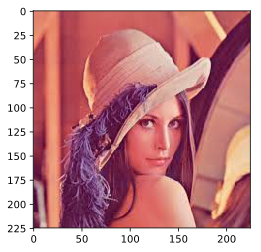

In [7]:
img = cv2.imread(filename=filename)

# OpenCVではGBRの準備で画像が読み込まれるが、JupyterNotebookではRGBで表示させる
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_img)
plt.show()

### 画像情報の取得

画像の高さ、幅、カラーの場合の色の数（通常RGBの3）を確認します。

In [8]:
def get_image_info(img):
  if len(img.shape) == 3:
    img_height, img_width, img_channels = img.shape[:3]
    print('img_channels :', img_channels)
  else:
    img_height, img_width = img.shape[:2]
    
  print('img_height :', img_height)
  print('img_width :', img_width)
  
get_image_info(img=img)

img_channels : 3
img_height : 225
img_width : 225


## 画像の保存

imwriteメソッドを利用します。

In [9]:
out_filename = '../lena_out.jpg'
cv2.imwrite(out_filename, img)

True

## 画像の回転

任意のサイズのスケールで回転させる関数を実装します。

In [10]:
def rotate_image(img, scale, angle):
  
  if len(img.shape) == 3:
    img_height, img_width, img_channels = img.shape[:3]
  else:
    img_height, img_width = img.shape[:2]
    
  size = tuple([img_width, img_height])
  center = tuple([int(img_width / 2), int(img_height / 2)])
  
  rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
  rotation_image = cv2.warpAffine(img, rotation_matrix, size, flags=cv2.INTER_CUBIC)
  
  # jupyter notebook に表示するときだけBGRをRGBに並べ替える
  rotation_rgb_img = cv2.cvtColor(rotation_image, cv2.COLOR_BGR2RGB)
  plt.imshow(rotation_rgb_img)
  plt.show()
  
  out_filename = '../rotation_scale_{}_angle_{}.jpg'.format(scale, angle)
  cv2.imwrite(out_filename, rotation_image)

画像の真ん中を中心にか30度回転してみます。

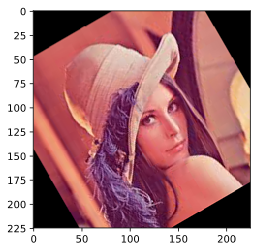

In [11]:
rotate_image(img=img, scale=1, angle=30)

サイズを2倍にして、画像の真ん中を中心にか30度回転してみます。

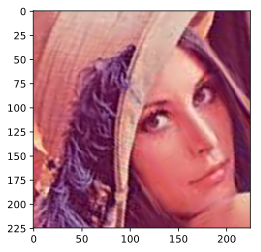

In [12]:
rotate_image(img=img, scale=2, angle=30)

画像の真ん中を中心にか-30度回転してみます。

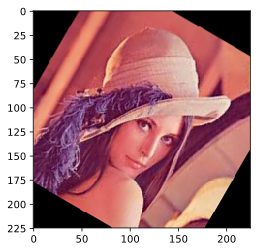

In [13]:
rotate_image(img=img, scale=1, angle=-30)

## 余白部の削除  領域の抽出

In [14]:
temp_img = cv2.imread(filename='../10.png')
contours_gray_img = cv2.cvtColor(temp_img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_img)
plt.gray()
plt.show()

NameError: name 'gray_img' is not defined

In [ ]:
def get_contours(img, off_set=1):
  _contours_image = img
  image, contours, hierarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  
  x1, y1, x2, y2 = [], [], [], []
  for i in range(1, len(contours)):
    # ret の中身は (x, y, w, h)
    ret = cv2.boundingRect(contours[i])
    x1.append(ret[0])
    y1.append(ret[1])
    x2.append(ret[0] + ret[2])
    y2.append(ret[1] + ret[3])

  x1_min = min(x1)
  y1_min = min(y1)
  x2_max = max(x2)
  y2_max = max(y2)

  # 枠取りをした結果を表示
  cv2.rectangle(_contours_image, (x1_min, y1_min), (x2_max, y2_max), (0, 255, 0), 2)

  # 少し余白を付けて付けて切り出し
  y1_min -= off_set
  y2_max += off_set
  x1_min -= off_set
  x2_max += off_set
  _contours_image = img[y1_min:y2_max, x1_min:x2_max]

  plt.imshow(_contours_image)
  plt.gray()
  plt.show()

get_contours(img=gray_img)

## ガウシアンフィルター
ガウス関数を重みとして、周りの画像の平均値を取ります。平均化する範囲を指定するカーネルとガウシアンの標準偏差$\sigma$を指定します。

In [ ]:
def show_gaussian_filter(img, average_size, sigma):
  _ret_image = cv2.GaussianBlur(img, (average_size, average_size), sigmaX=sigma, sigmaY=sigma)

  # jupyter notebook に表示するときだけBGRをRGBに並べ替える
  ret_image = cv2.cvtColor(_ret_image, cv2.COLOR_BGR2RGB)
  plt.imshow(ret_image)
  plt.show()

In [ ]:
show_gaussian_filter(img, average_size=11, sigma=10)

In [ ]:
show_gaussian_filter(img, average_size=21, sigma=10)

In [ ]:
show_gaussian_filter(img, average_size=3, sigma=10)

## canny方によるエッジ検出

In [ ]:
def show_canny_image(img, th1, th2, aperture):
  
  temp = cv2.Canny(img, threshold1=th1, threshold2=th2, apertureSize=aperture)
  
  # jupyter notebook に表示するときだけBGRをRGBに並べ替える
  plt.imshow(temp)
  plt.gray()
  plt.show()

In [ ]:
for i in range(0, 300, 60):
  for j in range(0, 300, 60):
    if i < j:
      print('th1 = {}, th2 = {}'.format(i, j))
      show_canny_image(gray_img, i, j, 3)